In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from scipy.stats import norm, entropy
from scipy import stats
from scipy.stats import ttest_ind, chi2_contingency

In [61]:
from scipy.stats import pearsonr as pcr
from collections import Counter as counter

In [62]:
pd.set_option('display.max_columns', None)

In [63]:
data = pd.read_csv("train.csv", header=0)
data.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [64]:
def understand_df(data):

    # Dimensions of dataset
    print(f"The dimension in the original data is {data.shape} \n")

    # Head of dataset
    print("First 10 rows of the dataset are \n", data.head(10), "\n\n")

    # Summary of dataset
    print("Summary of the dataset is \n", data.describe(), "\n\n")

    # Stats of dataset
    stats = []
    for col in data.columns:
        stats.append((col, data[col].nunique(), data[col].isnull().sum() * 100 / data.shape[0], data[col].value_counts(normalize=True, dropna=False).values[0] * 100, data[col].dtype))

    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
    print("Statistics of the dataset are \n", stats_df.sort_values('Percentage of missing values', ascending=False), "\n\n")

understand_df(data)
# in order for this to work

The dimension in the original data is (36992, 25) 

First 10 rows of the dataset are 
                             customer_id              Name  age gender  \
0      fffe4300490044003600300030003800   Pattie Morrisey   18      F   
1  fffe43004900440032003100300035003700       Traci Peery   32      F   
2      fffe4300490044003100390032003600   Merideth Mcmeen   44      F   
3  fffe43004900440036003000330031003600  Eufemia Cardwell   37      M   
4  fffe43004900440031003900350030003600      Meghan Kosak   31      F   
5  fffe43004900440036003300320035003300    Leslie Browder   13      M   
6  fffe43004900440031003100360037003900     Bridget Balog   21      M   
7      fffe4300490044003800300035003800    Herma Torgeson   42      M   
8  fffe43004900440033003300330032003200    Pattie Helmers   44      M   
9  fffe43004900440032003000340038003300    Shaquana Leech   45      F   

  security_no region_category  membership_category joining_date  \
0     XW0DQ7H         Village  Platinum Me

In [65]:
def discover_categorical_and_numerical(df):
  type_dictionary = {col: ("categorical" if df[col].dtype == "O" else "numerical") for col in df.columns}
  categorical = [key for key, val in type_dictionary.items() if val == "categorical"]
  numerical = df.columns.difference(categorical)
  return categorical, numerical

In [66]:
categorical, numerical = discover_categorical_and_numerical(data)

In [67]:
categorical, numerical

(['customer_id',
  'Name',
  'gender',
  'security_no',
  'region_category',
  'membership_category',
  'joining_date',
  'joined_through_referral',
  'referral_id',
  'preferred_offer_types',
  'medium_of_operation',
  'internet_option',
  'last_visit_time',
  'avg_frequency_login_days',
  'used_special_discount',
  'offer_application_preference',
  'past_complaint',
  'complaint_status',
  'feedback'],
 Index(['age', 'avg_time_spent', 'avg_transaction_value', 'churn_risk_score',
        'days_since_last_login', 'points_in_wallet'],
       dtype='object'))

In [68]:
data.head(10)

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5
5,fffe43004900440036003300320035003300,Leslie Browder,13,M,PSG1LGF,City,Gold Membership,2016-01-08,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,06:46:07,23,433.62,13884.77,24.0,722.27,Yes,No,Yes,Unsolved,No reason specified,3
6,fffe43004900440031003100360037003900,Bridget Balog,21,M,R3CX1EA,Town,Gold Membership,2015-03-19,Yes,CID24708,Gift Vouchers/Coupons,Desktop,Mobile_Data,11:40:04,10,55.38,8982.50,28.0,756.21,Yes,No,Yes,Solved in Follow-up,No reason specified,3
7,fffe4300490044003800300035003800,Herma Torgeson,42,M,4UJ1551,NaN,No Membership,2016-07-12,?,CID56614,Credit/Debit Card Offers,Both,Fiber_Optic,07:52:43,19,429.11,44554.82,24.0,568.08,No,Yes,Yes,Unsolved,Poor Product Quality,5
8,fffe43004900440033003300330032003200,Pattie Helmers,44,M,0481QNQ,Village,Silver Membership,2016-12-14,No,xxxxxxxx,Without Offers,Smartphone,Fiber_Optic,06:50:10,15,191.07,18362.31,20.0,NaN,Yes,No,Yes,Solved in Follow-up,Poor Customer Service,3
9,fffe43004900440032003000340038003300,Shaquana Leech,45,F,ZHP4MCR,Town,No Membership,2016-11-30,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,19:10:16,10,97.31,19244.16,28.0,706.23,No,Yes,Yes,No Information Available,Poor Customer Service,4


Clean String

In [69]:
def clean_string(df:pd.DataFrame, cols:list):
    import pandas as pd

    # Regular expression pattern to match the special characters to be removed
    pattern = r'[!\?\$,\.\#*_\+=@\-]'
    # domains = r'\.(com|gov|ai|org|ca|info)'

    for c in cols:
        # Check if column exists to avoid errors
        if c in df.columns:
            # Replace the characters matched by the pattern with an empty string
            df[c] = df[c].str.replace(pattern, "", regex=True)
            if df[c].str.endswith("%").any():
              df[c] = df[c].str.replace("\%", "")
              df[c].astype(float)
            # df[c].replace(domains, "", regex=True, inplace=True)
    return df

In [70]:
# Commenting out function calls as per instructions
# Example usage:
# import pandas as pd
# data = {'name': ['Anna!#', 'Bob@$', 'Charlie*+=']}
# df = pd.DataFrame(data)
df = clean_string(data, categorical)
df
# print(cleaned_df)

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,20170817,No,xxxxxxxx,Gift Vouchers/Coupons,,WiFi,16:08:02,17,300.630000,53005.25,170,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,20170828,,CID21329,Gift Vouchers/Coupons,Desktop,MobileData,12:38:13,16,306.340000,12838.38,100,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,20161111,Yes,CID12313,Gift Vouchers/Coupons,Desktop,WiFi,22:53:21,14,516.160000,21027.00,220,500.690000,No,Yes,Yes,Solved in Followup,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,20161029,Yes,CID3793,Gift Vouchers/Coupons,Desktop,MobileData,15:57:50,11,53.270000,25239.56,60,567.660000,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,20170912,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,MobileData,15:46:44,20,113.130000,24483.66,160,663.060000,No,Yes,Yes,Solved,Poor Website,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,fffe43004900440035003500390036003100,Cuc Tarr,46,F,6F51HFO,NaN,Basic Membership,20170921,No,xxxxxxxx,Credit/Debit Card Offers,Desktop,WiFi,04:14:05,2,-650.682759,27277.68,60,639.510000,No,Yes,Yes,No Information Available,No reason specified,4
36988,fffe43004900440033003500380036003600,Jenni Stronach,29,F,21KSM8Y,Town,Basic Membership,20160627,No,xxxxxxxx,Without Offers,Smartphone,WiFi,23:18:31,13,-638.123421,11069.71,280,527.990000,Yes,No,No,Not Applicable,Poor Customer Service,5
36989,fffe4300490044003500330034003100,Luciana Kinch,23,F,XK1IM9H,NaN,Basic Membership,20160911,Yes,CID3838,Gift Vouchers/Coupons,Desktop,WiFi,03:50:25,12,154.940000,38127.56,Error,680.470000,No,Yes,Yes,Unsolved,Poor Website,4
36990,fffe43004900440031003200390039003000,Tawana Ardoin,53,M,K6VTP1Z,Village,Platinum Membership,20170615,No,xxxxxxxx,Gift Vouchers/Coupons,Smartphone,MobileData,09:50:03,15,482.610000,2378.86,200,197.264414,Yes,Yes,No,Not Applicable,No reason specified,3


What variables are potentially non-factors?

Upon initial look, customer ID and security_no do not contribute to risk_churn_scores, so we can safely delete them.

In [71]:
nulls = data.isna().any().to_frame().reset_index().rename(columns={'index': 'column', 0: 'tf'})
nulls.head()

,column,tf
0,customer_id,False
1,Name,False
2,age,False
3,gender,False
4,security_no,False


In [72]:
null_indices = np.where(nulls["tf"]==True, 1, 0)
null_indices

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0])

Using a series of true and false to subset

In [73]:
data.columns[nulls["tf"]]

Index(['region_category', 'preferred_offer_types', 'points_in_wallet'], dtype='object')

In [74]:
nulls = data.isna().any().to_frame().reset_index().rename(columns={'index': 'column', 0: 'tf'})
nulls.head()

,column,tf
0,customer_id,False
1,Name,False
2,age,False
3,gender,False
4,security_no,False


In [75]:
def plot_correlation_matrix(df, dependent, numerical):
    # Compute the correlation matrix
    corr = df.corr(numeric_only=True).round(1) #

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(30, 30))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    plt.show()

    # correlation with the dependent variable
    correlations = {n: pcr(df[n], df[dependent]).statistic for n in numerical}
    correlations = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation'])
    correlations = correlations.sort_values('Correlation', ascending=False)

    # weak_corr = correlations[(np.abs(correlations["Correlation"])) < 0.5]
    return corr, correlations

In [76]:
correlations = {n: pcr(df[n], df["churn_risk_score"]).statistic for n in numerical}
list(correlations.items())
#correlations = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation'])
#correlations

ValueError: array must not contain infs or NaNs

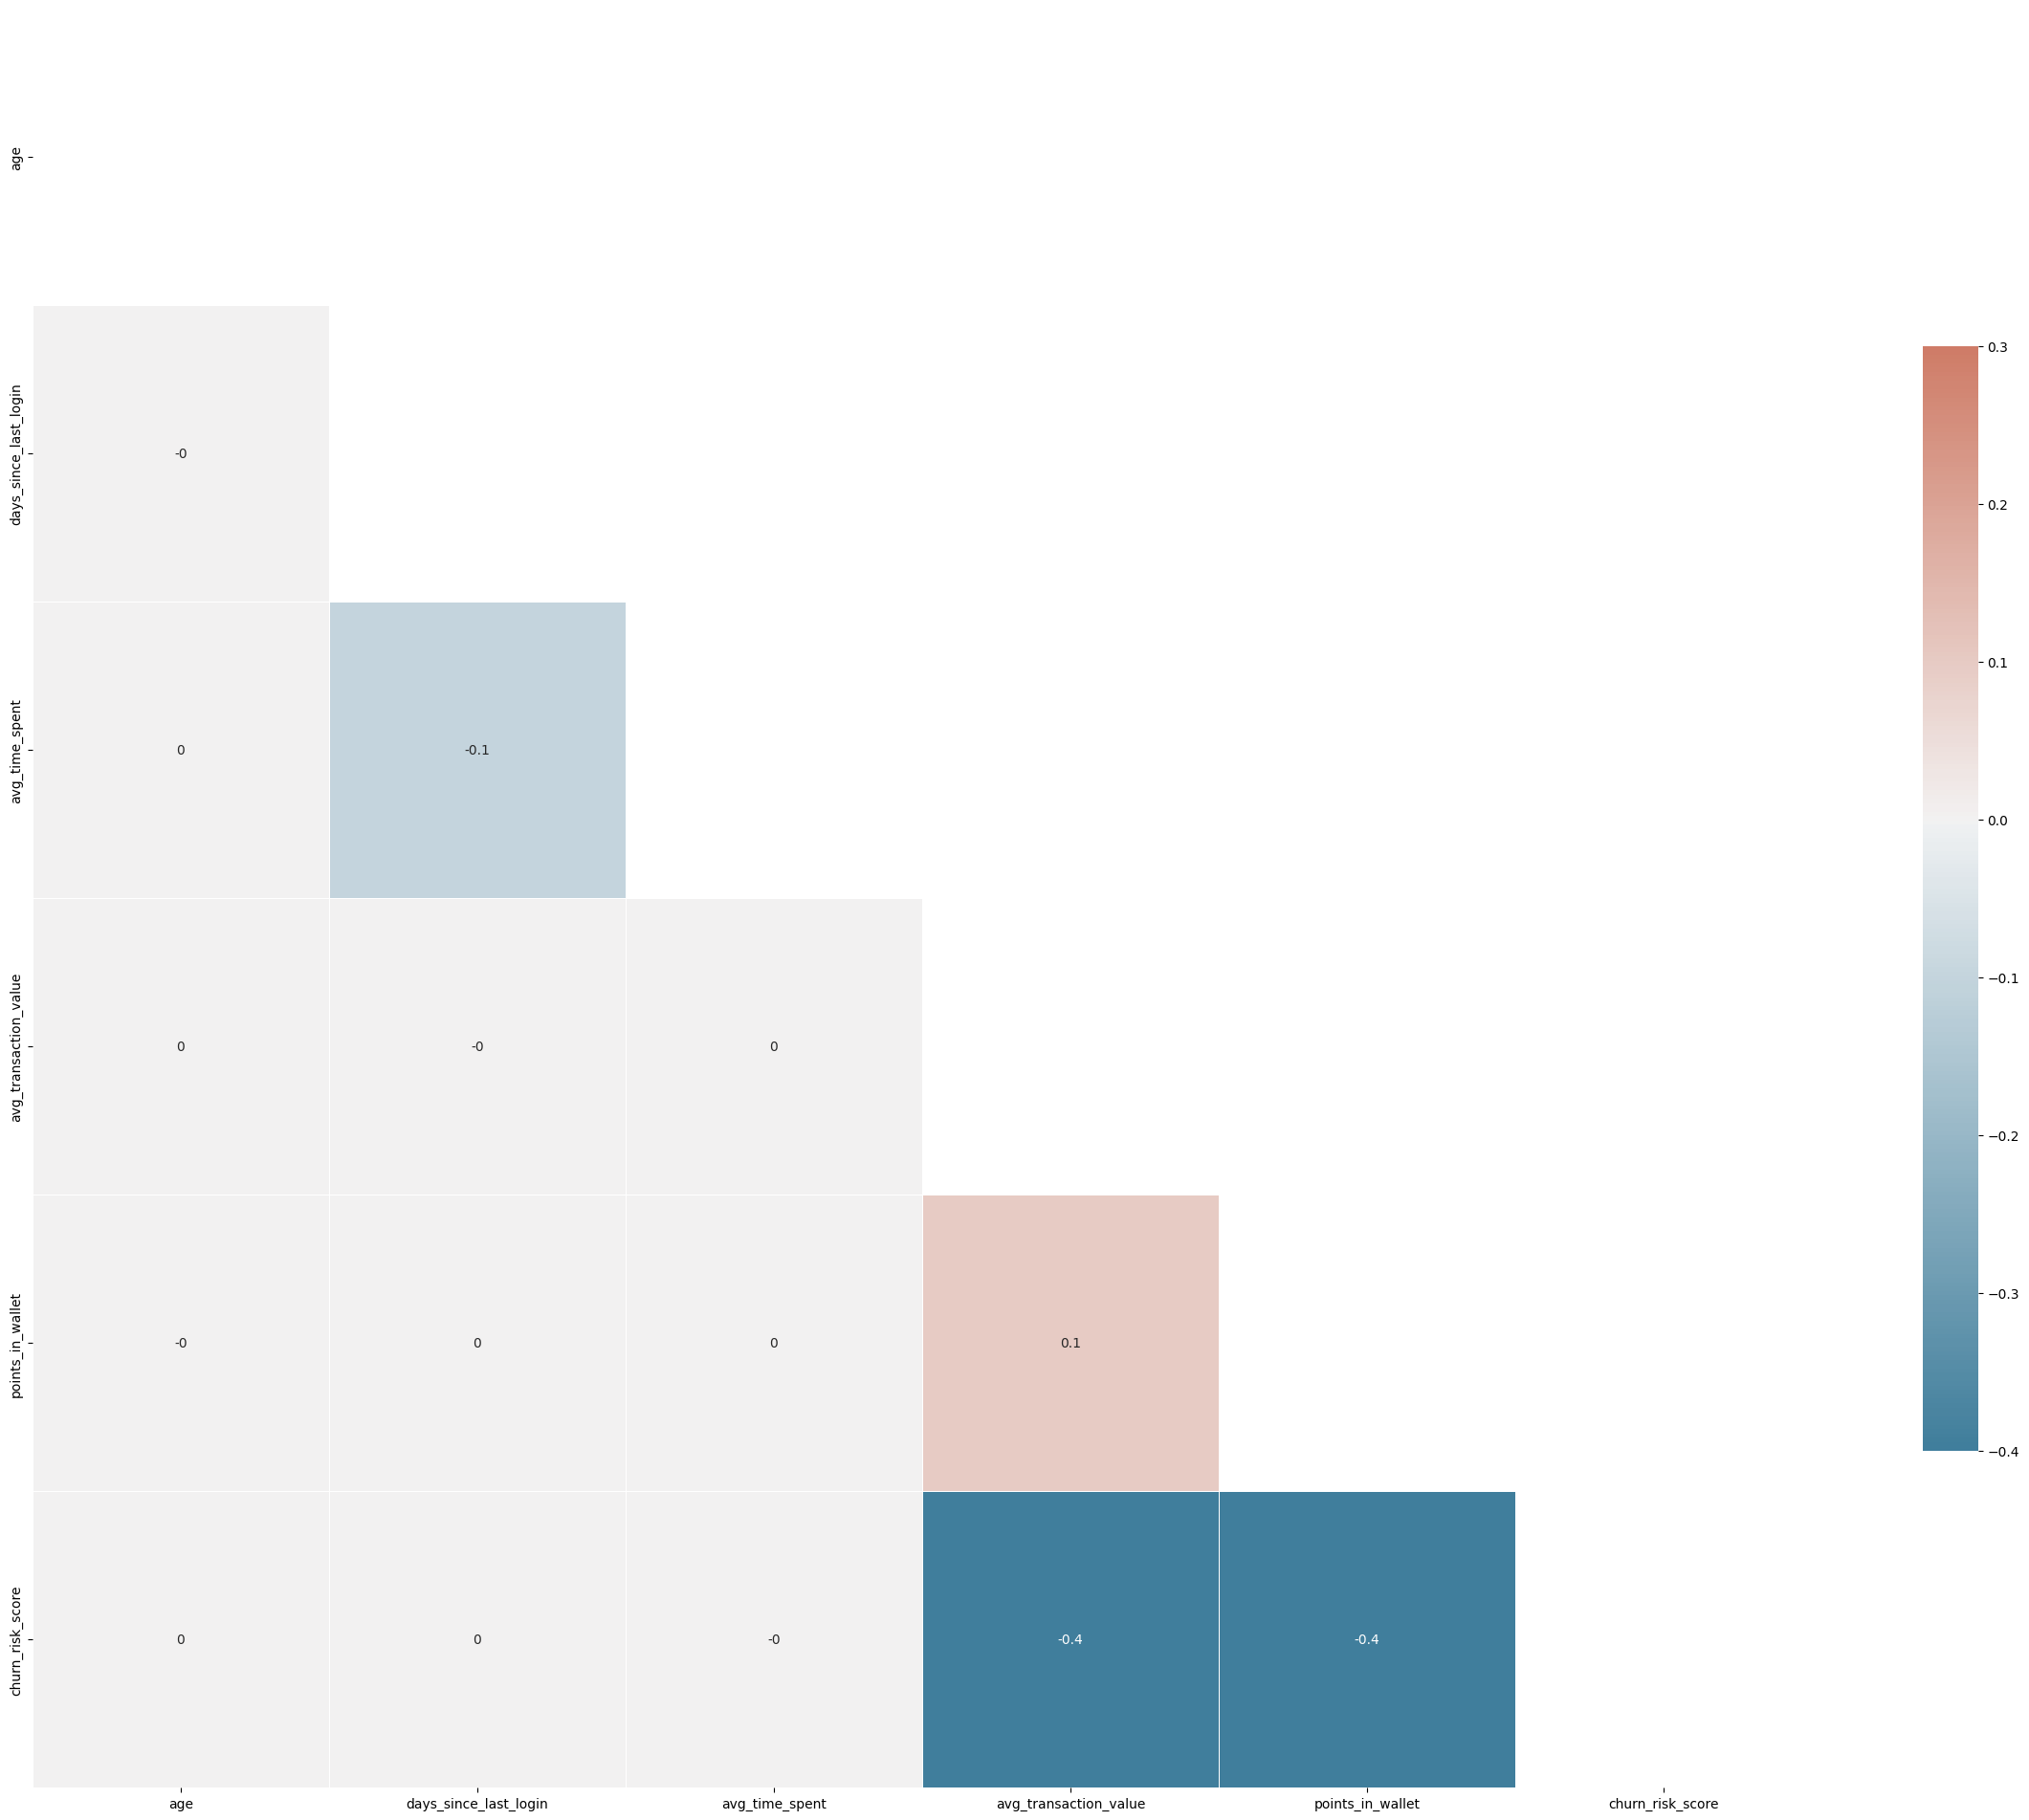

In [ ]:
corr, correlations = plot_correlation_matrix(df, "churn_risk_score", numerical)

In [ ]:
correlations

,Feature,Correlation
3,churn_risk_score,1.000000
4,days_since_last_login,0.019493
0,age,0.002400
1,avg_time_spent,-0.030005
2,avg_transaction_value,-0.352585
5,points_in_wallet,-0.402666


Select churn risk score that's not "-1"s

In [ ]:
data["churn_risk_score"].unique()

array([ 2,  1,  5,  3,  4, -1])

Could replace them but it's better to subset

In [ ]:
# data["churn_risk_score"] = data["churn_risk_score"].replace(-1, 0)

In [ ]:
data["churn_risk_score"].unique()

array([ 2,  1,  5,  3,  4, -1], dtype=int64)

In [ ]:
data["churn_risk_score"].value_counts()

churn_risk_score
 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: count, dtype: int64

In [ ]:
df = data[data["churn_risk_score"] != -1]
df["churn_risk_score"].unique()

array([2, 1, 5, 3, 4])

Detect outliers

In [ ]:
numerical

Index(['age', 'avg_time_spent', 'avg_transaction_value', 'churn_risk_score',
       'days_since_last_login', 'points_in_wallet'],
      dtype='object')

In [1]:
def outliers(df, numerical):
    for col in numerical:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
        print(f"{col} has {outliers} outliers")
        #print box plot of outliers
        #sns.boxplot(x=df[col])
        #plt.show()
outliers(df, numerical)


NameError: name 'df' is not defined

In [ ]:
def detect_outliers(df, numerical):
    for c in numerical:
        # Calculate Q1 and Q3
        Q1 = df[c].quantile(0.25)
        Q3 = df[c].quantile(0.75)
        # Calculate Interquartile Range (IQR)
        IQR = Q3 - Q1

        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        sns.boxplot(df, x=c)
        ax = sns.boxplot(y=c, data=df)
        plt.axhline(y=lower_bound, color='purple', linestyle='--', label='Lower Bound')
        plt.axhline(y=upper_bound, color='purple', linestyle='--', label='Upper Bound')
        plt.legend()
        plt.show()

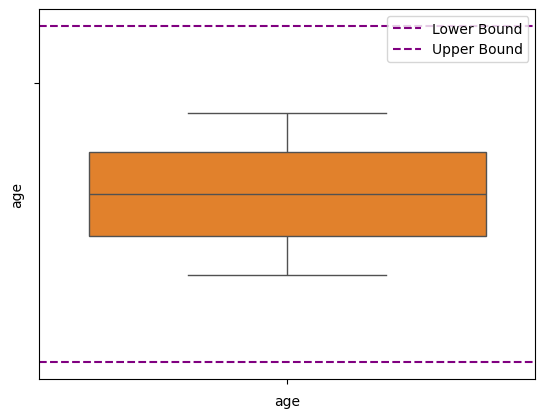

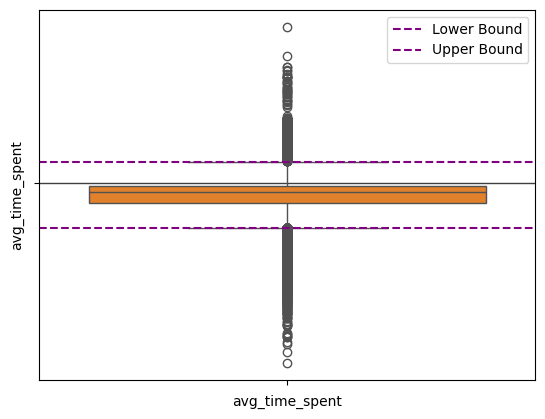

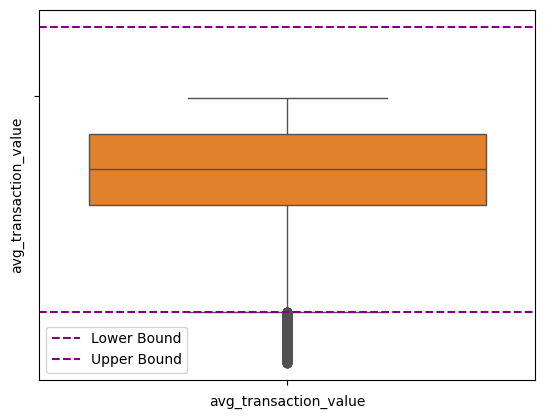

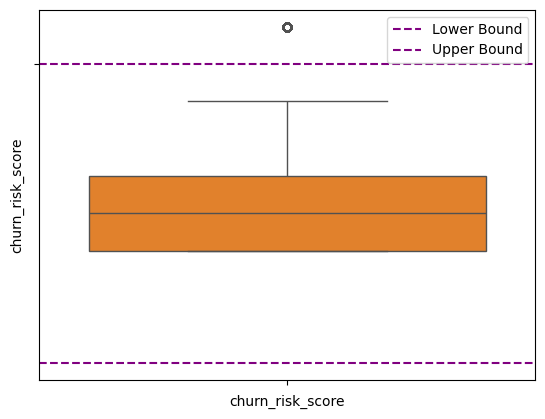

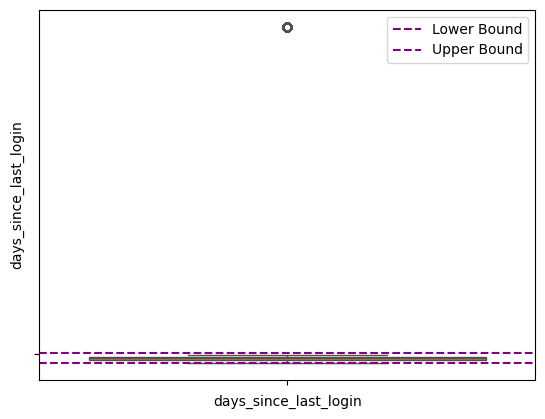

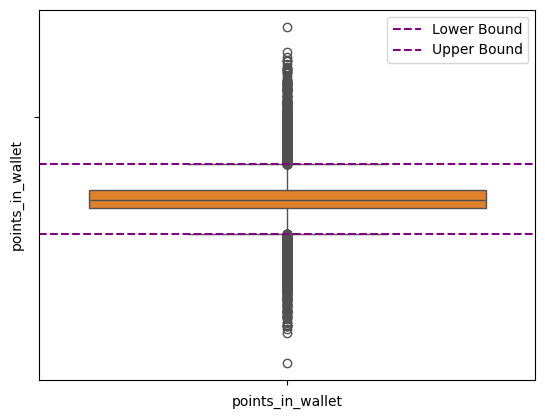

In [ ]:
detect_outliers(df, numerical)

Distributions (just 1 example)

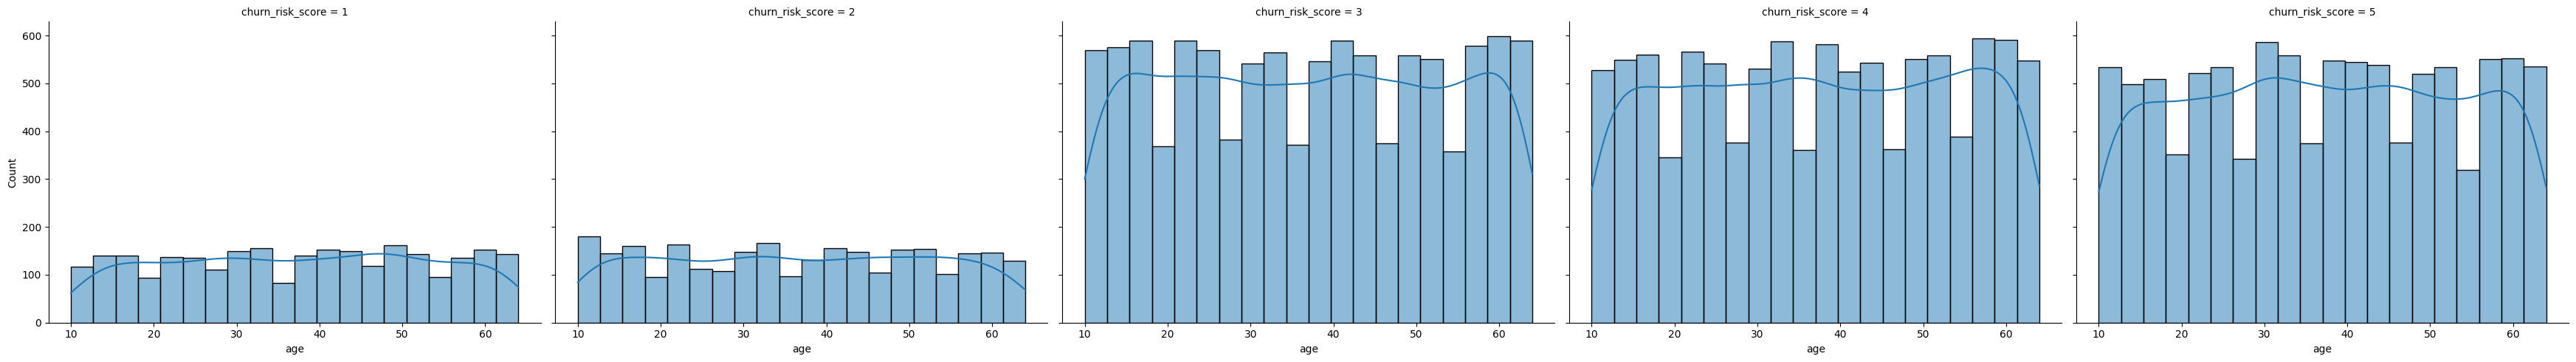

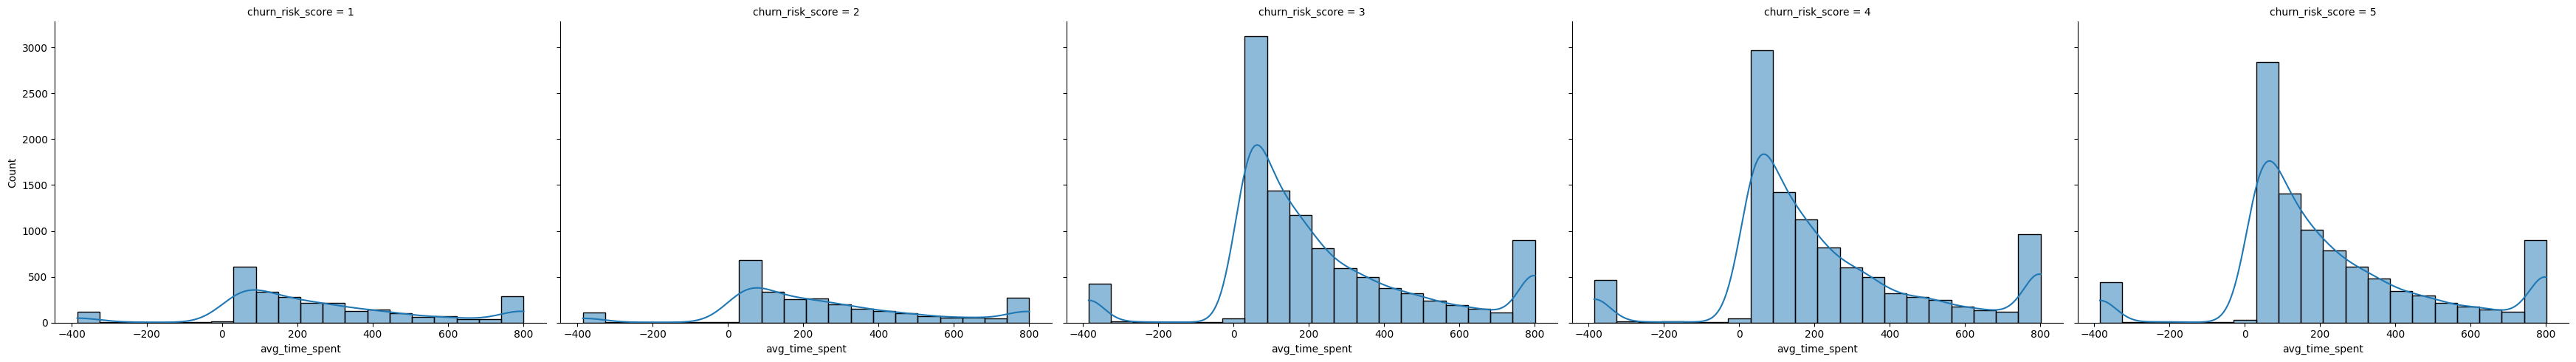

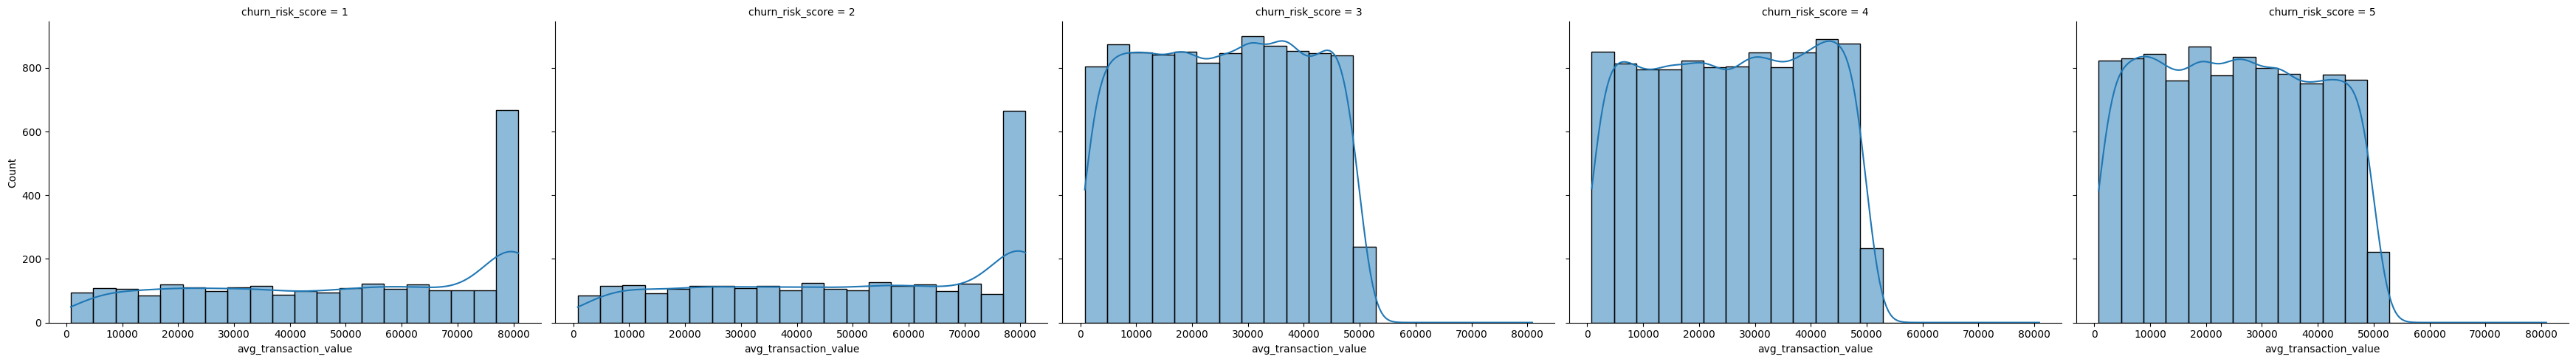

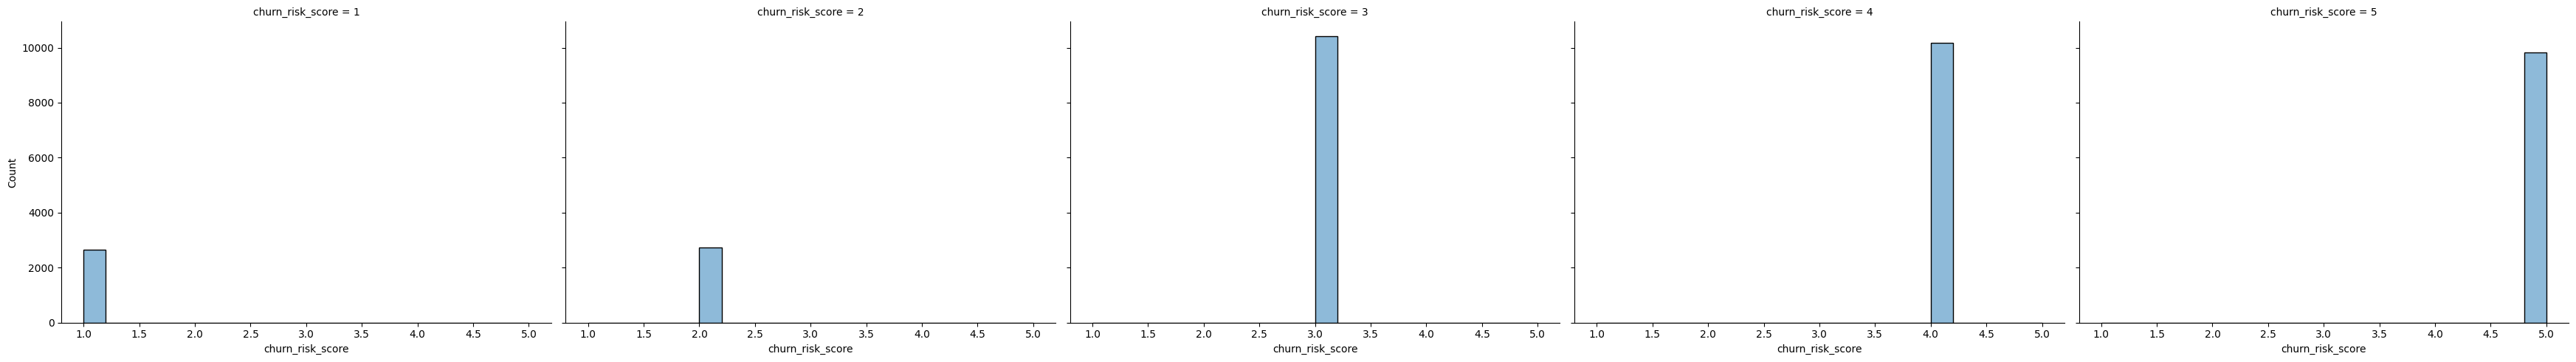

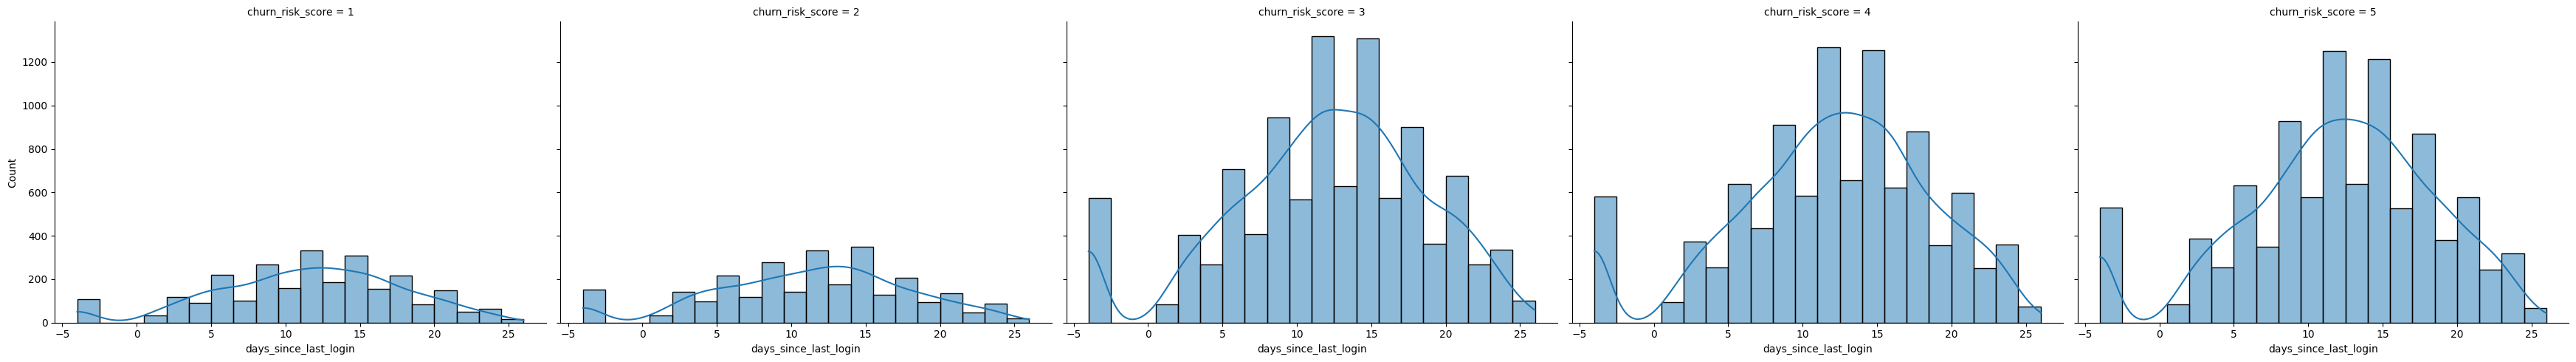

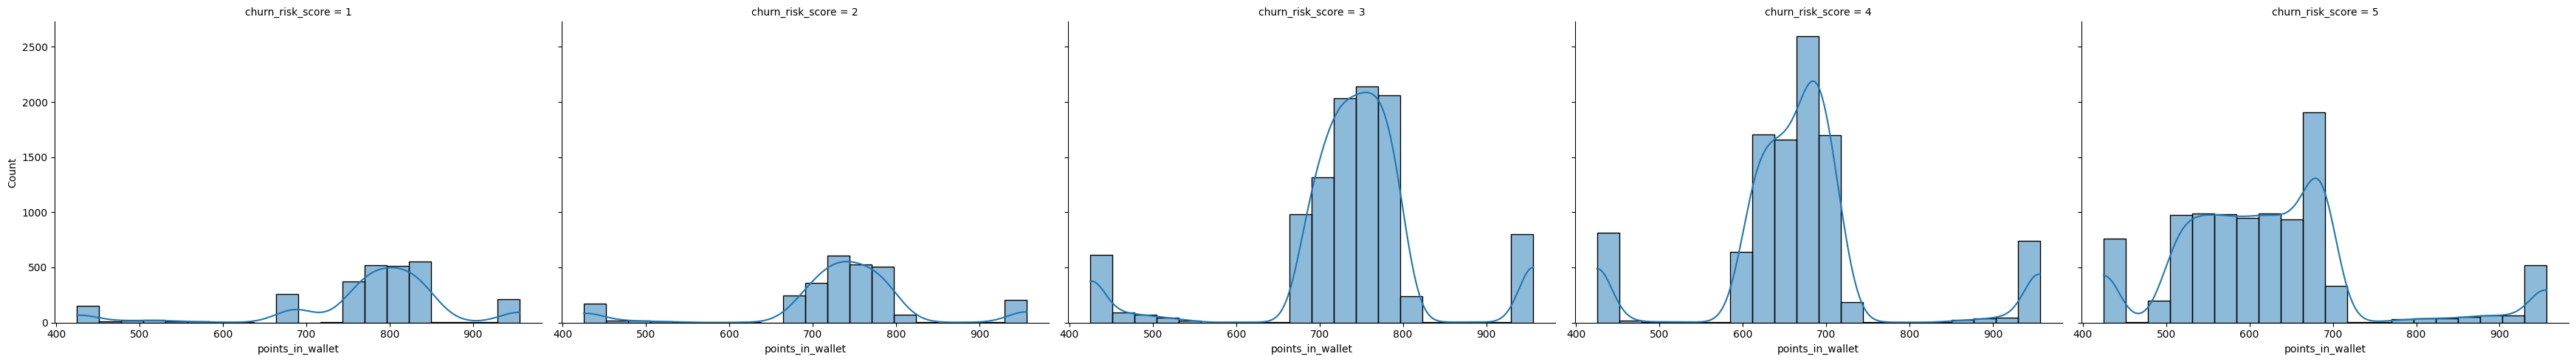

In [ ]:
for c in numerical:
  sns.displot(data=df, x=c, col="churn_risk_score", kind="hist", kde=True, aspect=1.4, bins=20)

Histogram for boxplots

Instead of removing outliers, we can change them to fit within certain boundaries ———— we won't lose data.

In [ ]:
def winsorize_outliers(df):
    """
    Adjusts outliers in the DataFrame using the winsorizing method based on the IQR.

    Args:
    df (pd.DataFrame): DataFrame containing numerical data.

    Returns:
    pd.DataFrame: DataFrame with outliers adjusted.
    """
    # Iterate through each column in the DataFrame
    for column in df.select_dtypes(include=[np.number]).columns:
        # Calculate Q1 and Q3
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        # Calculate Interquartile Range (IQR)
        IQR = Q3 - Q1

        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Winsorizing outliers
        df.loc[:,column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return df

In [ ]:
df = winsorize_outliers(df)

Fill Null values

In [ ]:
for c in numerical:
  if df[c].isnull().any():
    df.loc[:,c] = df[c].fillna(df[c].mean())

Explain Variance

In [77]:
def calculate_entropy(series):
    """
    Calculate the entropy of a Series.

    Args:
    series (pd.Series): Series for which to calculate the entropy.

    Returns:
    float: Entropy of the series.
    """
    p = series.value_counts(normalize=True)
    entropy = - np.sum(p * np.log2(p))
    return entropy

def information_gain(df, variable, dependent):
    """
    Calculate the information gain of splitting the dependent variable based on the independent variable.

    Args:
    df (pd.DataFrame): DataFrame containing the data.
    variable (str): Name of the independent variable.
    dependent (str): Name of the dependent variable.

    Returns:
    float: Information gain from the variable.
    """
    # Total entropy before split
    total_entropy = calculate_entropy(df[dependent])

    # Calculate the weighted entropy of splits
    weighted_entropy = 0

    for value, subset in df.groupby(variable):
        subset_entropy = calculate_entropy(subset[dependent])
        weight = len(subset) / len(df)
        weighted_entropy += weight * subset_entropy

    # Information gain is the total entropy minus the weighted entropy of the splits
    return total_entropy - weighted_entropy

In [ ]:
def top_n_explanatory_vars(df, categorical, dependent, n=None):
    """
    Identifies the top three numerical variables that explain the most variance in the dependent variable
    based on information gain for multi-label classification.

    Args:
    df (pd.DataFrame): DataFrame containing the data.
    dependent (str): The name of the dependent variable.

    Returns:
    list: A list of tuples with the variable names and their corresponding information gains, sorted by information gain.
    """
    results = []

    # Filter for numerical columns
    # numeric_cols = df[numerical] # df.select_dtypes(include=[np.number]).columns

    for c in categorical:
        # Calculate information gain for the column
        gain = information_gain(df, c, dependent)
        results.append((c, gain))

    # Sort results by information gain in descending order and return the top n
    results = pd.DataFrame(results, columns=["variable", "information_gain"])
    results.sort_values(by="information_gain", ascending=False)
    if n is not None:
      return results.iloc[:, n]
    else:
      return results

In [ ]:
categorical

['customer_id',
 'Name',
 'gender',
 'security_no',
 'region_category',
 'membership_category',
 'joining_date',
 'joined_through_referral',
 'referral_id',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'last_visit_time',
 'avg_frequency_login_days',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback']

Take "gender" as an example

In [ ]:
variable = 'gender'
dependent = "churn_risk_score"
np.sum([df[df[variable] == v][dependent].value_counts(normalize=True) * calculate_entropy(df[df[variable] == v][dependent].value_counts(normalize=True)) / value_counts[v] for v in df[variable].unique()])

NameError: name 'calculate_entropy' is not defined

In [ ]:
information_gain(df, "gender", "churn_risk_score")

0.0001321866233592317

In [ ]:
information_gain(df, "internet_option", "churn_risk_score")

0.00017975641451961621

In [ ]:
information_gain(df, "region_category", "churn_risk_score")

0.31066010031381497

In [ ]:
df["region_category"].value_counts().values

array([13702, 12315,  4549])

In [ ]:
[v for v in df.membership_category.unique()]

['Platinum Membership',
 'Premium Membership',
 'No Membership',
 'Gold Membership',
 'Silver Membership',
 'Basic Membership']

In [ ]:
information_gain(df, "membership_category", "churn_risk_score")

0.8528793871747178

In [80]:
information_gain(df, "joined_through_referral", "churn_risk_score")

0.003334688340715264

In [ ]:
# top_n_explanatory_vars(df, categorical, "churn_risk_score", n=5)

In [ ]:
df.gender.value_counts()

gender
F          17892
M          17881
Unknown       56
Name: count, dtype: int64

In [ ]:
value_counts = df["gender"].value_counts(normalize=False)
variable = "gender"
dependent = "churn_risk_score"

In [ ]:
df[df[variable] == "M"][dependent]

3        5
5        3
6        3
7        5
8        3
        ..
36983    5
36984    1
36986    3
36990    3
36991    2
Name: churn_risk_score, Length: 17881, dtype: int64

In [ ]:
df[df[variable] == "M"][dependent].value_counts(normalize=True)

churn_risk_score
3    0.293328
4    0.282535
5    0.273027
2    0.077568
1    0.073542
Name: proportion, dtype: float64

In [ ]:
value_counts = df["gender"].value_counts(normalize=False)
value_counts

gender
F          17892
M          17881
Unknown       56
Name: count, dtype: int64

In [ ]:
value_counts["M"]

17881

In [ ]:
np.sum(df[df[variable] == "M"][dependent].value_counts(normalize=True) * calculate_entropy(df[df[variable] == "M"][dependent].value_counts(normalize=True)) / value_counts["M"])

0.00012985448771810093

In [ ]:
calculate_entropy(df[df[variable] == "M"][dependent].value_counts())
#weighted_entropy = {df[df[variable] == v][dependent].value_counts(normalize=True) for v in df[variable].unique()}
# weighted_entropy = np.sum((df[df[variable] == v][dependent].value_counts(normalize=True) * calculate_entropy(df[df[variable] == v][dependent]).value_counts(normalize=True) / value_counts) for v in df[variable].unique())
# weighted_entropy

0.00012985448771810093

In [ ]:
information_gain(df, "gender", "churn_risk_score")

2.10727683042694

In [ ]:
for c in numerical:
  print(calculate_entropy(df[c]))

5.780395603477824
12.9134527101299
14.811163797044037
2.107666393890094
4.539073134242872
11.993498887132892


In [ ]:
# hypothesis testing
def test_missingness(one, df, explanatory_vars):
    """
    Tests whether the missingness in a specified variable is random or systematic
    using t-tests and chi-squared tests.

    Args:
    df (pd.DataFrame): The DataFrame to analyze.
    variable (str): The target variable with potential missing values.
    explanatory_vars (list): List of column names in df that might explain missingness.

    Returns:
    dict: A dictionary containing the test results for each explanatory variable.
    """
    results = {}
    # Create a binary column 'is_missing' where 1 indicates missing and 0 indicates not missing
    df[f'{one}_is_missing'] = df[one].isnull().astype(int)

    for var in explanatory_vars:
    #   For numeric explanatory variables, a t-test compares means between groups (missing vs. not missing).
    #   For categorical variables, a chi-squared test checks for independence between categories and missingness.
        if df[var].dtype in [np.number, 'float64', 'int64']:  # Check if the variable is numeric
            # Perform t-test
            group1 = df[df[f'{one}_is_missing'] == 1][var].dropna()
            group2 = df[df[f'{one}_is_missing'] == 0][var].dropna()
            t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  # Welch's t-test
            results[var] = {'test_type': 't-test', 'variable': var, 't_stat': t_stat, 'p_value': p_value}
        else:
            # Perform chi-squared test
            contingency_table = pd.crosstab(df[f'{one}_is_missing'], df[var])
            chi2, p_value, _, _ = chi2_contingency(contingency_table)
            results[var] = {'test_type': 'chi-squared', 'variable': var, 'chi2_stat': chi2, 'p_value': p_value}

In [ ]:
def single_variate_drop_duplicates_and_fill_null_vals(df, numerical, dependent, method="mean"):
  # drop duplicates
  df = df.drop_duplicates()

  # if the function is for n in null_columns:
  df = df[numerical]
  df.fillna(method, inplace=True)
  return df

Note that we previously fixed the outliers issue so now we can trust the mean value more for missing value imputation

In [ ]:
df = single_variate_drop_duplicates_and_fill_null_vals(df, numerical, "churn_risk_score", method="mean")
df

,age,avg_time_spent,avg_transaction_value,churn_risk_score,days_since_last_login,points_in_wallet
0,18,300.63,53005.25,2,17,781.750000
1,32,306.34,12838.38,1,16,686.849231
2,44,516.16,21027.00,5,14,500.690000
3,37,53.27,25239.56,5,11,567.660000
4,31,113.13,24483.66,5,20,663.060000
...,...,...,...,...,...,...
36987,46,-384.97,27277.68,4,2,639.510000
36988,29,-384.97,11069.71,5,13,527.990000
36989,23,154.94,38127.56,4,12,680.470000
36990,53,482.61,2378.86,3,15,425.140000


Some more EDA

In [ ]:
"""
def pivot_tables(df, categorical, index, columns, values):
  pivot = df[categorical].drop_duplicates()\
    .assign(price_group=lambda x: pd.cut(x., bins=5))\
    .pivot(index=index, columns=columns, values=values)
  return pivot
"""

In [ ]:
summary = data.groupby(["membership_category"])["churn_risk_score"].mean().reset_index()
summary

,membership_category,churn_risk_score
0,Basic Membership,4.470999
1,Gold Membership,2.900074
2,No Membership,4.494540
3,Platinum Membership,2.304518
4,Premium Membership,2.296521
5,Silver Membership,3.186039


In [ ]:
data.membership_category.unique()

array(['Platinum Membership', 'Premium Membership', 'No Membership',
       'Gold Membership', 'Silver Membership', 'Basic Membership'],
      dtype=object)

In [ ]:
data.avg_frequency_login_days.value_counts()

avg_frequency_login_days
Error                  3522
13.0                   1394
19.0                   1365
8.0                    1361
14.0                   1355
                       ... 
28.191570401129514        1
41.73357294995208         1
-11.515939810499656       1
45.71683637272365         1
27.8399274405269          1
Name: count, Length: 1654, dtype: int64

In [ ]:
data.avg_frequency_login_days.unique()

array(['17.0', '10.0', '22.0', ..., '-9.32551114210603',
       '-8.759329712785977', '27.8399274405269'], dtype=object)

<Axes: >

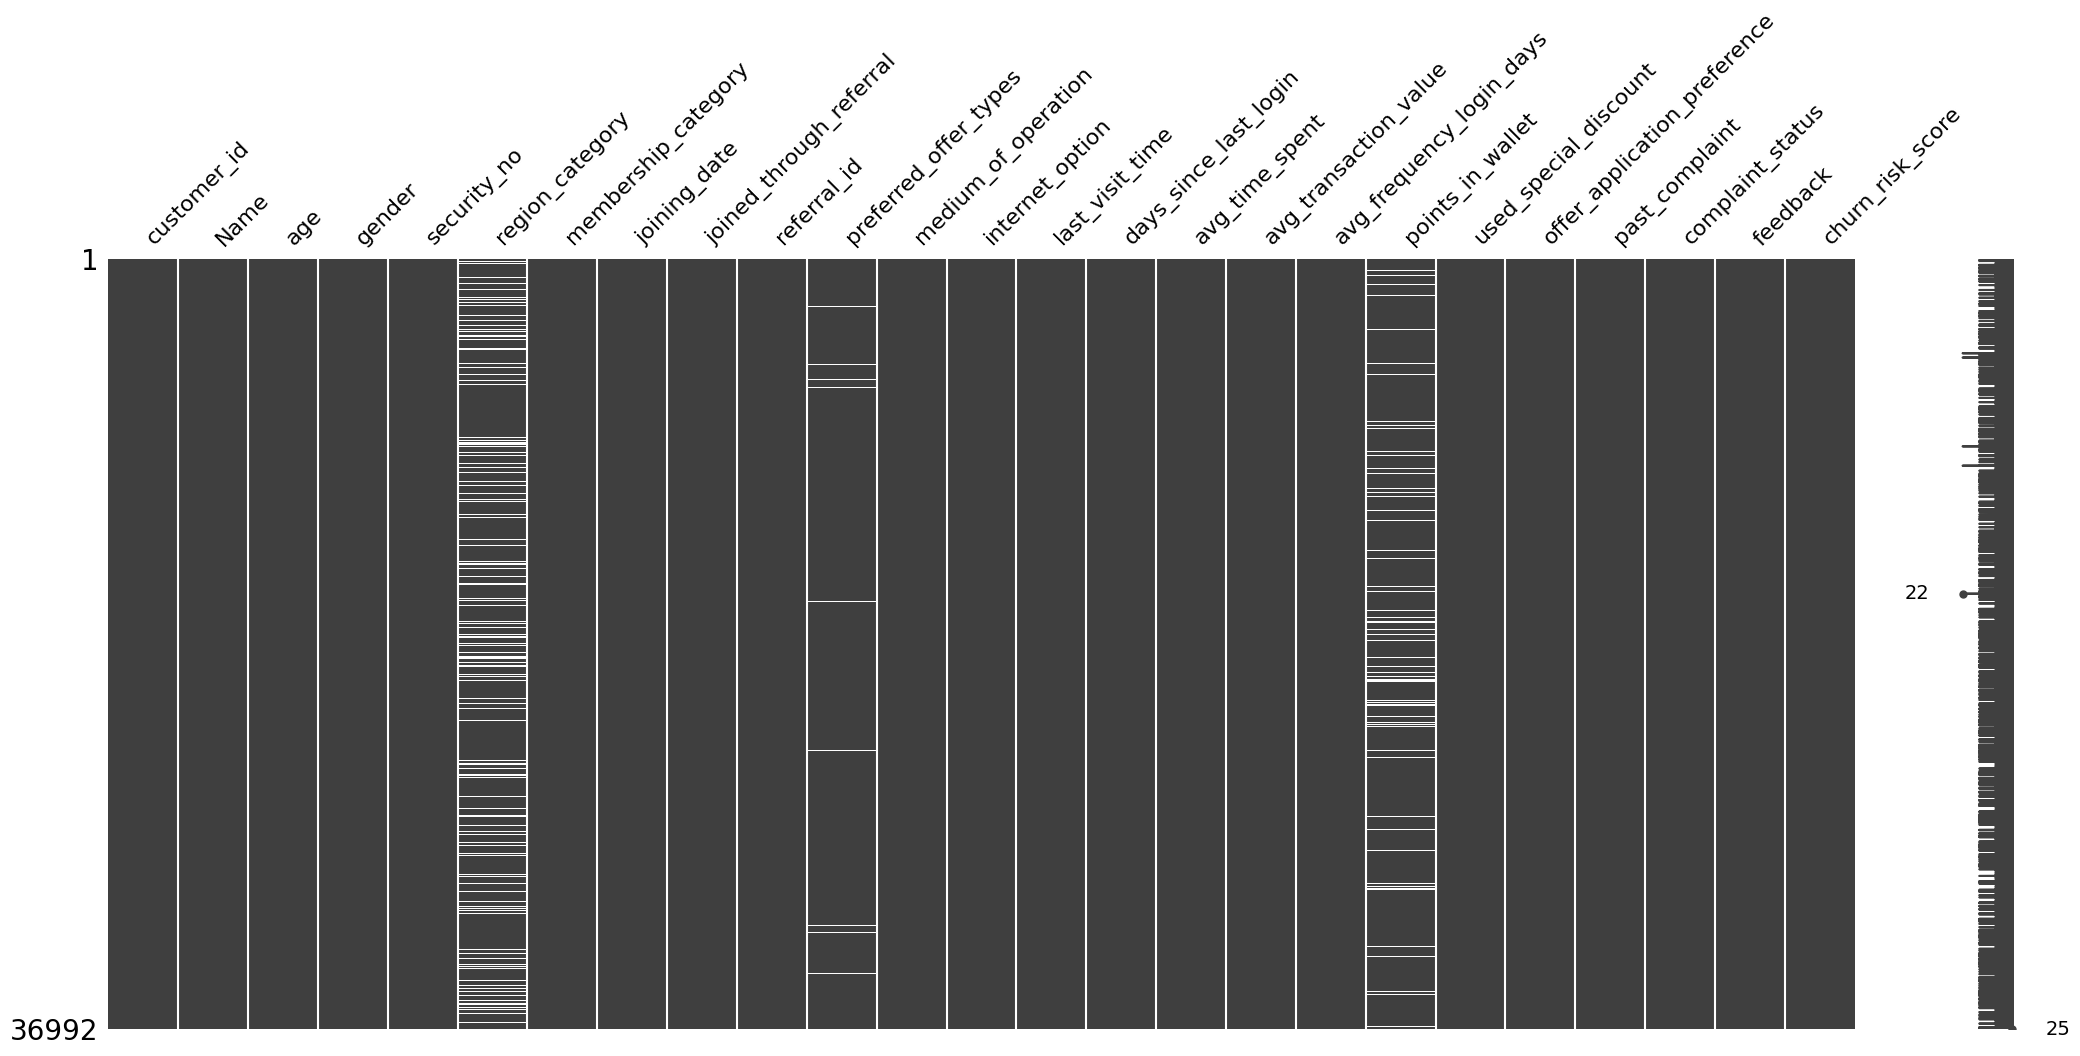

In [ ]:
import missingno as msno
msno.matrix(data)

In [82]:
data.isna().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [83]:
#data type of data
data.dtypes

customer_id                      object
Name                             object
age                               int64
gender                           object
security_no                      object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
referral_id                      object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days         object
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn_risk_score                  int64


#### Summary Tables for Categorical Features

In [ ]:
df = data.groupby("gender")['churn_risk_score'].mean().reset_index()
df

,gender,churn_risk_score
0,F,3.463277
1,M,3.463645
2,Unknown,3.423729


In [ ]:
data["churn_risk_score"].describe()

count    36992.000000
mean         3.463397
std          1.409661
min         -1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: churn_risk_score, dtype: float64

In [ ]:
data["churn_risk_score"].dtype

dtype('int64')

In [ ]:
categorical[categorical!="customer_id"]

['customer_id',
 'Name',
 'gender',
 'security_no',
 'region_category',
 'membership_category',
 'joining_date',
 'joined_through_referral',
 'referral_id',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'last_visit_time',
 'avg_frequency_login_days',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback']

In [ ]:
def group_summary_stats(df, categorical, dependent):
    # Check if the dependent column is numeric, convert if necessary
    if df[dependent].dtype == 'O':  # Checks if the type is object (commonly used for strings)
        df[dependent] = pd.to_numeric(df[dependent], errors='coerce')  # Coerce errors will convert non-convertible values to NaN

    # Iterate through each categorical variable and calculate statistics
    for i, c in enumerate(categorical):
        # Properly using .agg to calculate multiple statistics
        report = pd.DataFrame(df.groupby(c)[dependent]).agg(['sum', 'mean', 'median', lambda x: stats.mode(x)[0][0], 'max', 'min']).reset_index()
        report.columns = ["Group", "Total", "Average", "Median", "Mode", "Maximum", "Minimum"]
        print(f"Report {i+1}:\n{report}\n")

In [ ]:
data

In [ ]:
for c in categorical:
  df = data.groupby(c)['churn_risk_score'].mean().reset_index()
  df

In [ ]:
# group_summary_stats(data.loc[:, [i for i in categorical if i !="customer_id"]], [i for i in categorical if i !="customer_id"], "churn_risk_score")

Do the same for other columns

Model Building

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming df is your DataFrame and 'target' is the column with the labels

# Prepare Data
x = df.drop('churn_risk_score', axis=1)  # Removes the target column, keeps all others
y = df['churn_risk_score']
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=42)

# Build Decision Tree Model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(x_train, y_train)

# Evaluate the Model
y_pred = dt_classifier.predict(x_val)
print(classification_report(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))

              precision    recall  f1-score   support

           1       0.53      0.57      0.55       679
           2       0.37      0.39      0.38       685
           3       0.66      0.63      0.65      2686
           4       0.51      0.51      0.51      2505
           5       0.56      0.57      0.56      2403

    accuracy                           0.56      8958
   macro avg       0.53      0.54      0.53      8958
weighted avg       0.56      0.56      0.56      8958

Accuracy: 0.5578254074570217


https://towardsdatascience.com/decision-trees-explained-entropy-information-gain-gini-index-ccp-pruning-4d78070db36c